In [307]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [308]:
df = pd.read_excel("Solar Generation.xlsx")

In [309]:
df

,Date,Solar Generation(MU)
0,2017-01-01,26.0
1,2017-01-02,28.0
2,2017-01-03,25.0
3,2017-01-04,29.0
4,2017-01-05,19.0
...,...,...
1907,2022-03-23,227.0
1908,2022-03-24,237.0
1909,2022-03-25,233.0
1910,2022-03-26,237.0


In [310]:
df.describe()

,Solar Generation(MU)
count,1912.000000
mean,117.744885
std,55.192891
min,19.000000
25%,77.000000
50%,116.530000
75%,157.250000
max,266.000000


In [311]:
from datetime import datetime

df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df.set_index(['Date'])
df.head()

,Solar Generation(MU)
Date,
2017-01-01,26.0
2017-01-02,28.0
2017-01-03,25.0
2017-01-04,29.0
2017-01-05,19.0


# 1) Descriptive statistics of data and interpret these results.


In [312]:
# Measures of Central Tendency
#Mean, Median, mode
df.mean()

Solar Generation(MU)    117.744885
dtype: float64

The average power production is 117.74 MU

In [313]:
df.mode(axis = 0)

,Solar Generation(MU)
0,42.0
1,44.0


Most frequent  Solar power Generation(MU) are 42 and 44 

In [314]:
df.median()

Solar Generation(MU)    116.53
dtype: float64

median value of solar production data is 116.53 MU

In [315]:
#Standard Deviation
#Standard deviation is a measure that is used to quantify the amount of variation
#of a set of data values from its mean. 

df.std()

Solar Generation(MU)    55.192891
dtype: float64

as Standard deviation is high, solar power generation is much dispersed with the mean solar power generation.

In [316]:
# Variance 
#variance is how far the data is spread out. It is interpreted as like standard Deviation


df.var()    

Solar Generation(MU)    3046.255214
dtype: float64

In [317]:
#IQR - Inter Quartile Range

from scipy.stats import iqr

iqr(df)


80.25

IQR is the difference between Upper Quartile(75 percentile) and Lower Quartile(25 percentile)
its shows the difference of 75 percentile of solar generation to the 25 percentile of solar generation. 

In [318]:
#skewness
df.skew()

Solar Generation(MU)    0.205902
dtype: float64

The skew value show that our data is approximately skewed distribution with moderately +ve skewed . Meaning Higher values sare more spreadlt distributed in the data.

In [319]:
df.sum()

Solar Generation(MU)    225128.22
dtype: float64

Total Solar generation.

In [320]:
df.max()

Solar Generation(MU)    266.0
dtype: float64

highest solar generation in a day

In [321]:
df.min()

Solar Generation(MU)    19.0
dtype: float64

Lowest solar generation in a day

In [322]:
#We can calculate everything in a single time
df.describe()

,Solar Generation(MU)
count,1912.000000
mean,117.744885
std,55.192891
min,19.000000
25%,77.000000
50%,116.530000
75%,157.250000
max,266.000000


# 2. Check for the stationarity of the data using unit root test.

The stationarity of data is described by the following three criteria:-

1) It should have a constant mean

2) It should have a constant variance

3) Auto covariance does not depend on the time

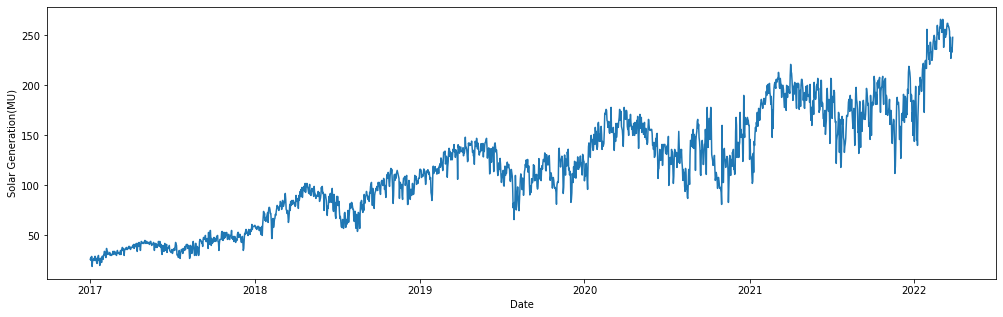

In [324]:
plt.rcParams["figure.figsize"] = (17,5)
plt.xlabel("Date")
plt.ylabel("Solar Generation(MU)")
plt.plot(df)

Above representation shows an upward trend so we can conclude that Data is non-stationary. We can also test it by doing unit root test

In [325]:
#Augmented Dickey-fuller test
#Dataset1
from statsmodels.tsa.stattools import adfuller
print("Observations of Dickey-fuller test")
df_test = adfuller(df['Solar Generation(MU)'],autolag='AIC')
df_output=pd.DataFrame(df_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in df_test[4].items():
    df_output['critical value (%s)'%key]= value
print(df_output)

Observations of Dickey-fuller test
                                       0  critical value (1%)  \
Test Statistic                 -0.542540            -3.433818   
p-value                         0.883444            -3.433818   
#lags used                     23.000000            -3.433818   
number of observations used  1888.000000            -3.433818   

                             critical value (5%)  critical value (10%)  
Test Statistic                         -2.863072             -2.567586  
p-value                                -2.863072             -2.567586  
#lags used                             -2.863072             -2.567586  
number of observations used            -2.863072             -2.567586  


dickey-fuller test :

The test statistic value (-0.5425) is not less than the critical values (-3.4338 , -2.8630 , -2.5675) at different percentage and the p-value is close to 1. So, we cannot reject our null hypothesis. We can conclude that data is not stationary.

#  3) Transforming non-stationary data to make it stationary

first to check whether the data is non-linear or not. if it is non-linear trend then we can use log function to remove the non-linearity of the data.

Detrending: It is used for convert non-stationary series to sationary. Subtracting with an estimate for trend and deal with residuals.

Differencing:- This method is also used for making non-staionary series to stationary . By taking the differences of consecutive observations. we can use pandas's function .diff() for this.

In [326]:
df['diff_1'] =  df["Solar Generation(MU)"].diff(periods=1)
df['diff_2'] =  df["Solar Generation(MU)"].diff(periods=2)
df['diff_3'] =  df["Solar Generation(MU)"].diff(periods=3)

df.dropna(inplace = True)
df.head(5)

,Solar Generation(MU),diff_1,diff_2,diff_3
Date,,,,
2017-01-04,29.0,4.0,1.0,3.0
2017-01-05,19.0,-10.0,-6.0,-9.0
2017-01-06,25.0,6.0,-4.0,0.0
2017-01-07,26.0,1.0,7.0,-3.0
2017-01-08,25.0,-1.0,0.0,6.0


In [328]:
# log_df = pd.DataFrame(np.log(df["Solar Generation(MU)"]))
# plt.xlabel("Date")
# plt.ylabel("Solar Generation(MU)")
# plt.plot(log_df)

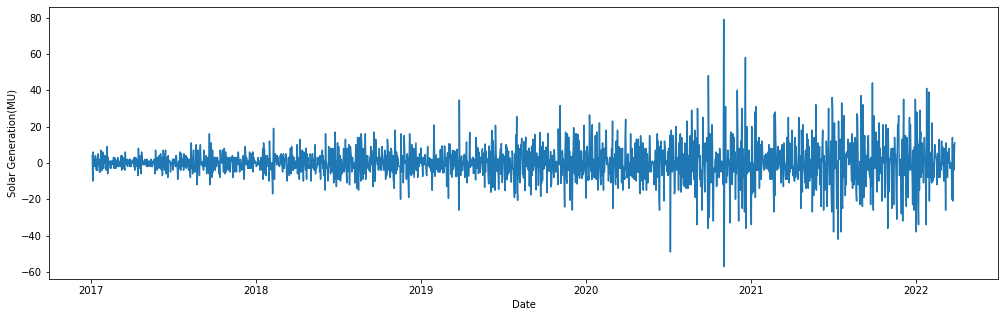

In [327]:
plt.xlabel("Date")
plt.ylabel("Solar Generation(MU)")
plt.plot(df['diff_1'])

It shows the results of first, second, and third-order differencing.

p-value is very close to zero and test statistic value is less then critical values at different percentage. Now we can conclude the transformed_df['diff_1'] data is stationary.

In [329]:
#performing "Augmented Dickey-fuller test" 
#Dataset1

print("Observations of Dickey-fuller test")
df_test = adfuller(df['diff_1'],autolag='AIC')
df_output=pd.DataFrame(df_test[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in df_test[4].items():
    df_output['critical value (%s)'%key]= value
print(df_output)

Observations of Dickey-fuller test
                                        0  critical value (1%)  \
Test Statistic              -1.261973e+01            -3.433824   
p-value                      1.587944e-23            -3.433824   
#lags used                   2.300000e+01            -3.433824   
number of observations used  1.885000e+03            -3.433824   

                             critical value (5%)  critical value (10%)  
Test Statistic                         -2.863075             -2.567587  
p-value                                -2.863075             -2.567587  
#lags used                             -2.863075             -2.567587  
number of observations used            -2.863075             -2.567587  


In [330]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

# selecting P and Q value for these models using ACF and PACF?
 
We can select the p and q values for these models by analysing the ACF and PACF plots.
Lets have a look over AR, MA, ARIMA models

## Auto-Regressive(AR) model-

AR model assumes that the current value Y(t) is dependent on previous values.
It is a linear regression model.

Regression with its past values

    Y(t) = c + B1*Y(t-1) + B2*Y(t-2)......Bp*Y(t-p) + Error

p is order of AR; p = 3 that means y(t) is dependent on past 3 periods.To figure out P we use PACF.

PACF stands for "partial auto-correlation function". It is partial correlation coefficients between the series and lags of itself.

## Moving Average(MA) model- 

MA model assumes that the current value Y(t) is dependent on the error terms including the current errors.
Error terms are random, hence there is no linear relationship between current value and the error terms. 

Y(t) depends on error of the previous lagged values

    Y(t) = c + E(t) + b1*E(t-1) + b2*E(t-2).....bq*E(t-q)

q is the order of MA. To figure out q we use ACF.

ACF stands for "auto-correlation function". We can use ACF to identify how correlated the values are with each other.

## ARIMA (AR+I+ML) model  


ARIMA stands for "Auto-Regressive Integrated Moving Average"

    Y(t) = c + B1*Y(t-1) + B2*Y(t-2)......Bn*Y(t-n) + E(t) + b1*E(t-1) + b2*E(t-2).....bq*E(t-q)

(p,d,q) are the orders of ARIMA

Integrated ~~ Differenced 

Difference the data to remove trend and seasonality to make data stationary.
d is the order of difference i.e How many times we differenced the data 


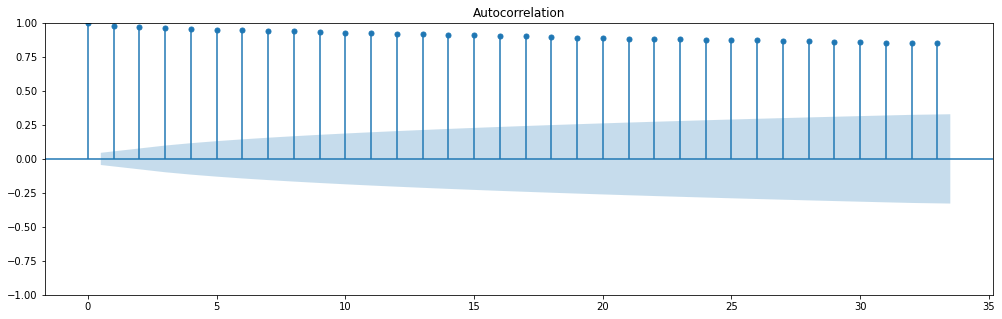

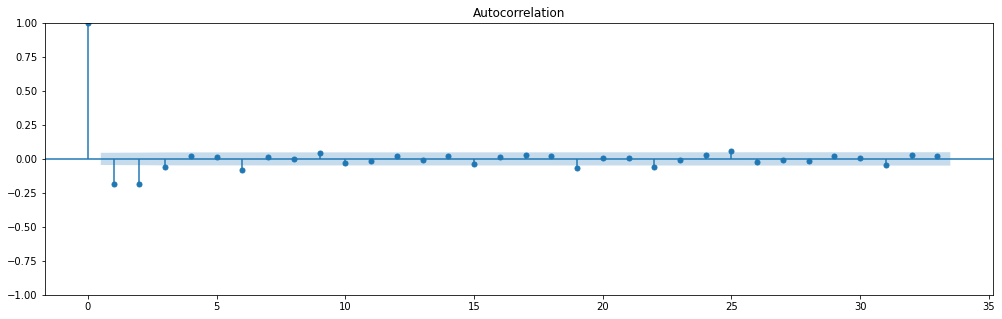

In [331]:
# Plotting ACF for the actual vs transformed data
# ACF plot
plot_acf(df['Solar Generation(MU)']);
plot_acf(df['diff_1']);


for Transformed data (df['diff_1']), the autocorrelations are significant for 3 legs and and after that the autocorrelations at lags 4 and above are merely due to the propagation of the autocorrelation at lag 1. 
We can also confirmed it by PACF.

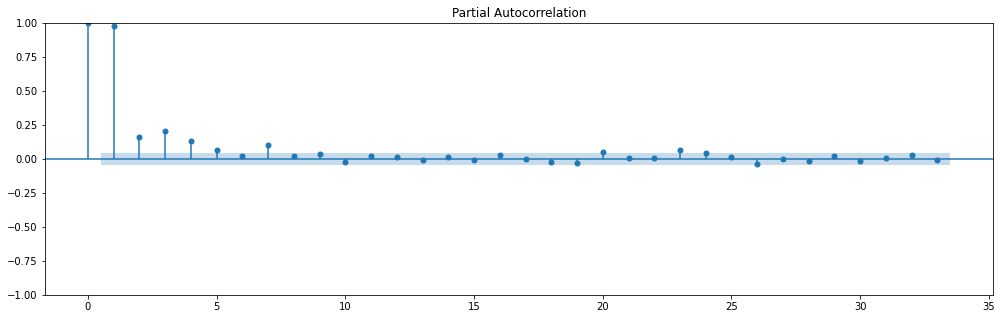

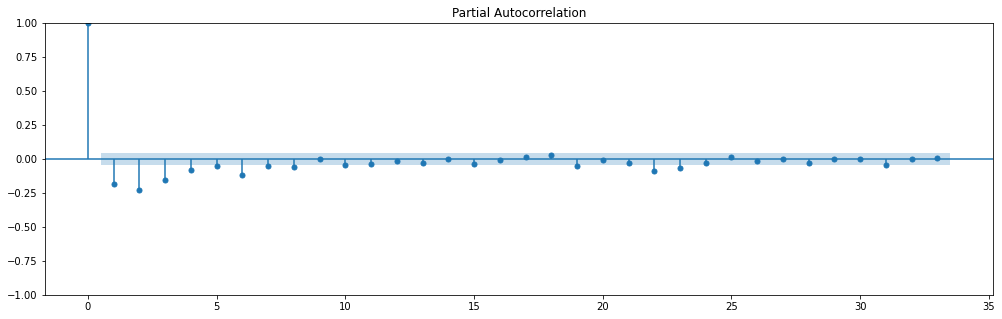

In [332]:
# Plotting PACF for the transformed data
# PACF Plot

import warnings
warnings.filterwarnings('ignore')
plot_pacf(df['Solar Generation(MU)']);
plot_pacf(df['diff_1']);


for Transformed data(df['diff_1']), Note that the PACF plot have significant spikes upto 4 lags , meaning that all the higher-order autocorrelations are effectively explained by the 4 lags autocorrelations.

# Visualizing and comparing  forecasting results of AR, MA and ARIMA

##  AR Model

In [333]:
# lets build AR model on transformed data

train_data = df['diff_1'][:len(df)-200]
test_data = df['diff_1'][len(df)-200:]

In [334]:
# Instantiate and fit the AR model with training date
#lets take p = 3 , d = 0 and q = 0 i.e = AR model

ar_model = ARIMA(train_data, order = (3,0,0)).fit()
ar_model

In [335]:
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 diff_1   No. Observations:                 1709
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -6195.830
Date:                Sat, 16 Apr 2022   AIC                          12401.661
Time:                        17:47:00   BIC                          12428.879
Sample:                    01-04-2017   HQIC                         12411.734
                         - 09-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0825      0.129      0.639      0.523      -0.170       0.335
ar.L1         -0.2783      0.015    -18.615      0.000      -0.308      -0.249
ar.L2         -0.2708      0.019    -14.223      0.0

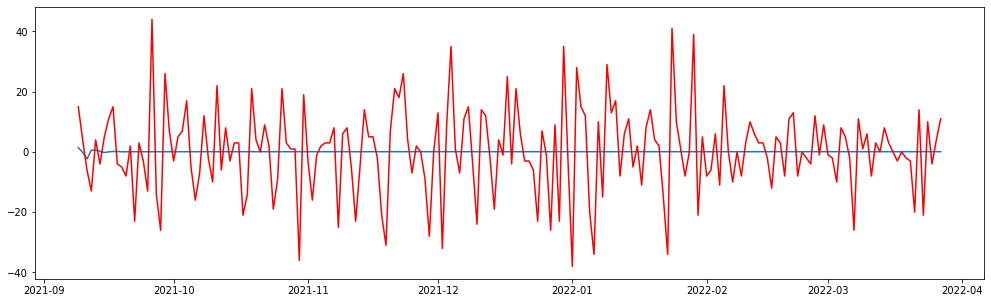

In [336]:
# Make the predictions

pred_ar = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data

plt.plot(pred_ar)
plt.plot(test_data, color='red')

In [337]:
from sklearn.metrics import mean_squared_error 
error_ar_model = np.sqrt(mean_squared_error(test_data,pred_ar))
error_ar_model

14.264754888886047

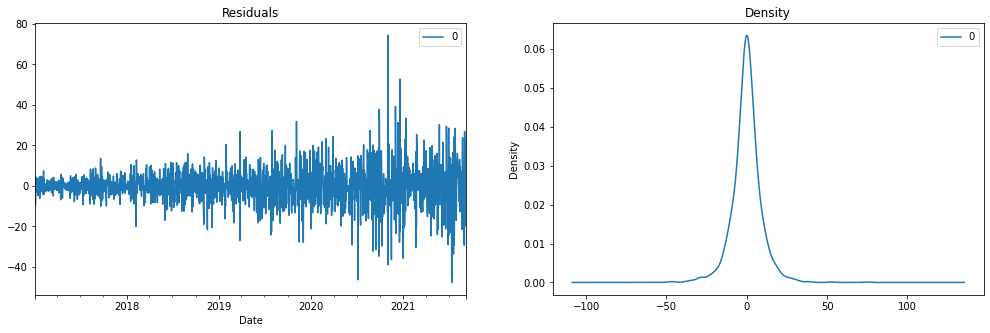

In [338]:
# Plot residual errors
residuals = pd.DataFrame(ar_model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## MA model

In [339]:
# Instantiate and fit the MA model with training date
#lets take p = 0 , d = 0 and q = 3 i.e = MA model
ma_model = ARIMA(train_data, order = (0,0,3)).fit()
ma_model

In [340]:
print(ma_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 diff_1   No. Observations:                 1709
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -6176.531
Date:                Sat, 16 Apr 2022   AIC                          12363.062
Time:                        17:47:19   BIC                          12390.280
Sample:                    01-04-2017   HQIC                         12373.135
                         - 09-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0819      0.081      1.007      0.314      -0.077       0.241
ma.L1         -0.3118      0.015    -20.340      0.000      -0.342      -0.282
ma.L2         -0.2324      0.019    -12.187      0.0

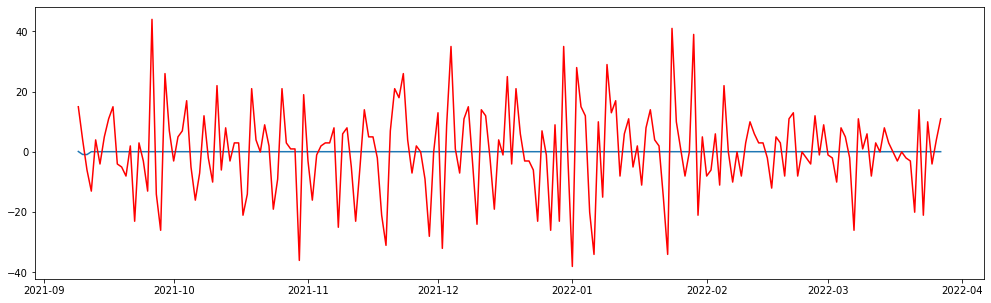

In [341]:
# Make the predictions

pred_ma = ma_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data

plt.plot(pred_ma)
plt.plot(test_data, color='red')

In [342]:
error_ma_model = np.sqrt(mean_squared_error(test_data,pred_ma))
error_ma_model

14.272246831187278

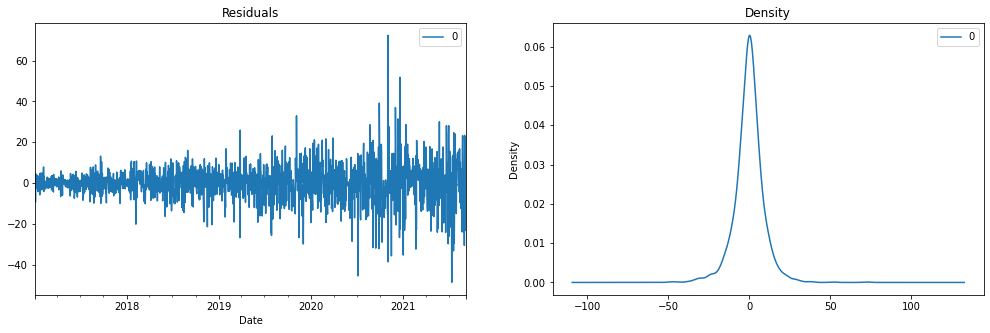

In [343]:
# Plot residual errors
residuals = pd.DataFrame(ma_model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## ARIMA model

In [344]:
#Now Taking ARIMA model
# lets take p = 3, q = 3 and d = 1

arima_model = ARIMA(train_data, order = (3,1,3)).fit()
arima_model

In [345]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                 diff_1   No. Observations:                 1709
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -6176.851
Date:                Sat, 16 Apr 2022   AIC                          12367.703
Time:                        17:47:32   BIC                          12405.804
Sample:                    01-04-2017   HQIC                         12381.805
                         - 09-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5192      0.032    -16.195      0.000      -0.582      -0.456
ar.L2          0.3940      0.040      9.887      0.000       0.316       0.472
ar.L3         -0.0816      0.020     -4.151      0.0

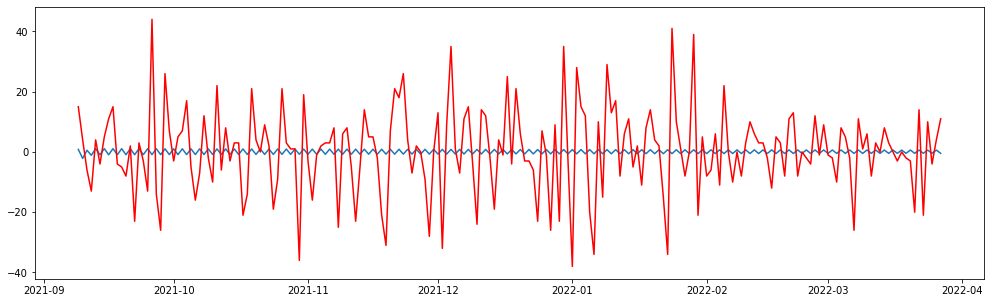

In [346]:
# Make the predictions

pred_arima = arima_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

# Plot the prediction vs test data

plt.plot(pred_arima)
plt.plot(test_data, color='red')

In [347]:
error_arima_model = np.sqrt(mean_squared_error(test_data,pred_arima))
error_arima_model

14.250989682121336

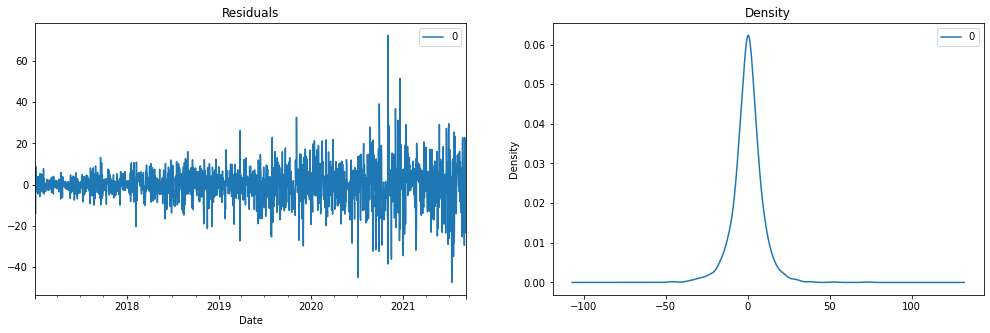

In [348]:
# Plot residual errors
residuals = pd.DataFrame(arima_model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. 

## Forcasting visualisation and comparison

<AxesSubplot:xlabel='Date'>

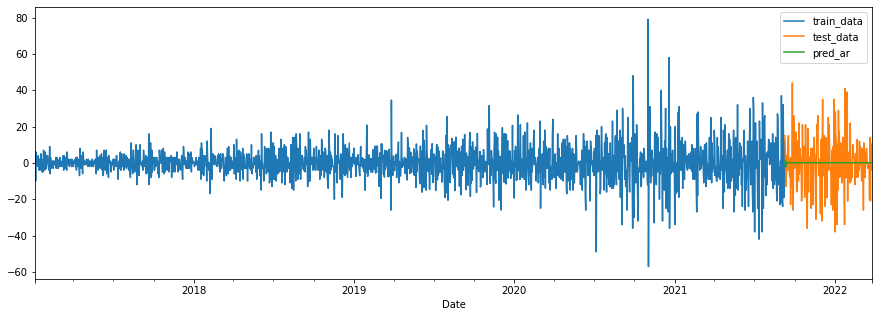

In [349]:
train_data.plot(legend = True, label = "train_data",figsize = (15,5))
test_data.plot(legend = True, label = "test_data")
pred_ar.plot(legend = True, label = "pred_ar")

<AxesSubplot:xlabel='Date'>

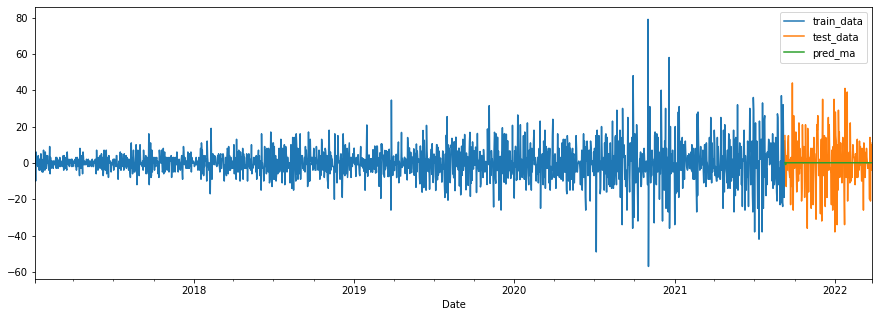

In [350]:
train_data.plot(legend = True, label = "train_data",figsize = (15,5))
test_data.plot(legend = True, label = "test_data")
pred_ma.plot(legend = True, label = "pred_ma")

<AxesSubplot:xlabel='Date'>

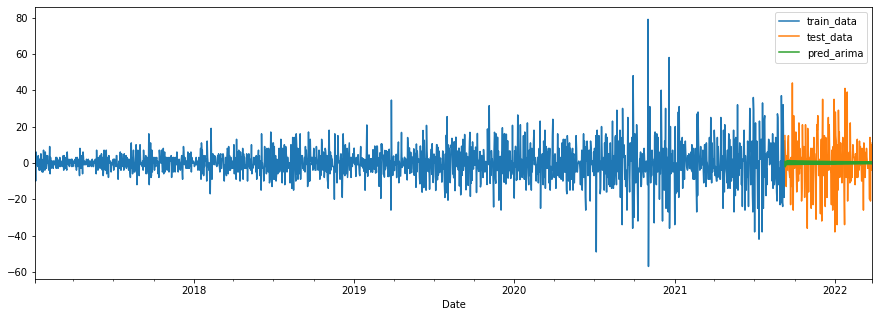

In [351]:
train_data.plot(legend = True, label = "train_data",figsize = (15,5))
test_data.plot(legend = True, label = "test_data")
pred_arima.plot(legend = True, label = "pred_arima")

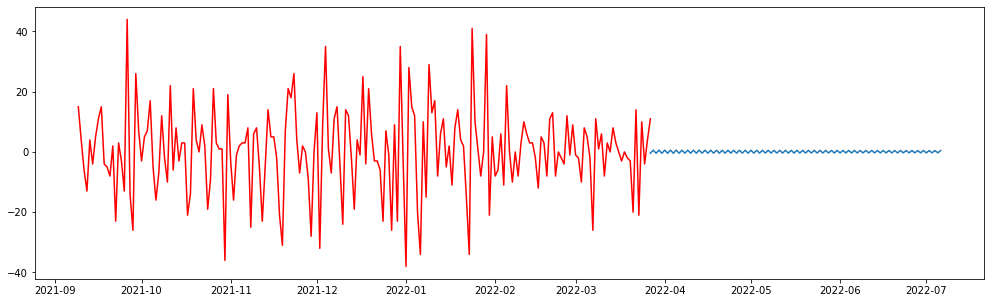

In [352]:
future_pred_arima = arima_model.predict(start=(len(df)-1), end=(len(df)+100), dynamic=False)

# 100 future values prediction 

plt.plot(future_pred_arima)
plt.plot(test_data, color='red')

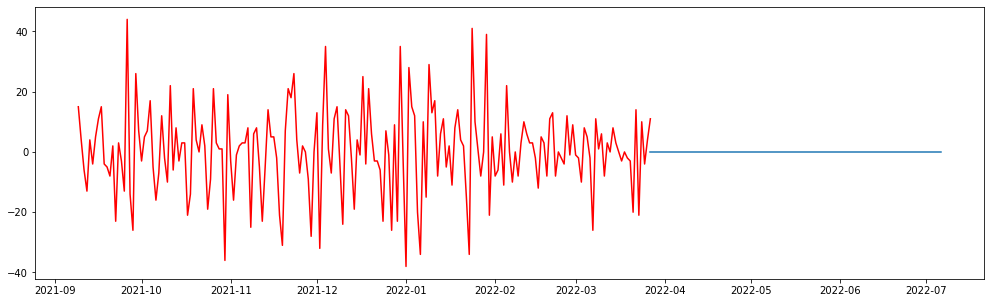

In [353]:
future_pred_ar = ar_model.predict(start=(len(df)-1), end=(len(df)+100), dynamic=False)

# 100 future values prediction 

plt.plot(future_pred_ar)
plt.plot(test_data, color='red')

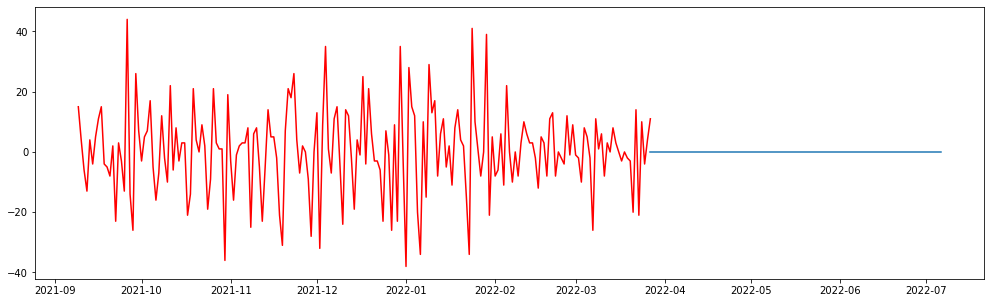

In [354]:
future_pred_ma = ma_model.predict(start=(len(df)-1), end=(len(df)+100), dynamic=False)

# 100 future values prediction 

plt.plot(future_pred_ma)
plt.plot(test_data, color='red')

In [355]:
# Likelihood-ratio test
from scipy.stats.distributions import chi2
def LLR_test(m1, m2, DF = 1):
    L1 = m1.llf
    L2 = m2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF)
    return p

In [357]:
print("Likelihood-ratio test -")
print('AR vs MA :-',LLR_test(ar_model,ma_model))
print('AR vs ARIMA :-',LLR_test(ar_model,arima_model))
print('MA vs ARIMA :-',LLR_test(ma_model,arima_model))

Likelihood-ratio test -
AR vs MA :- 5.204540968369604e-10
AR vs ARIMA :- 7.22852210914208e-10
MA vs ARIMA :- 1.0


Our models shows very less mean square error, this can be further reduced by removing non-linearity of the data and taking optimum values of p,q and d. 
For all three models the forcasting value is almost same for this data. For all the models the forcasting result was almost flat as haven't use decomposition of data in seasonal variation.

Our three models have very less LLR ratio or equal to 1, which shows that all three of the models are producing almost same result.